In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Introduction
Previously, to calculate the statistics of a random walker, I was doing the following method:
1. set the number of steps
2. run an ensemble of random walkers with the specified number of steps
3. store the end points and calculate the statistics of endpoints of the ensemble
4. do 1,2,3 again for another number of steps

and Lastly I was plotting the calculated statistics with respect to the number of steps.

But I just figured out that there is a better a much faster way to do that! Here is the algorithm:
1. set the maximun number of steps (i.e. 100 steps)
2. run an ensemble of random walkers with that many steps specified at 1
3. store the result at matrix with form:


\begin{bmatrix} 
	w_1(0) & w_1(1) & w_1(2) &...& w_1(n) \\
	w_2(0) & w_2(1) & w_2(2) &...& w_2(n) \\
	w_3(0) & w_3(1) & w_3(2) &...& w_3(n) \\
    ... \\
    w_n(0) & w_n(1) & w_n(2) &...& w_n(n) \\
\end{bmatrix}

now if you calculate the mean/variance over axis 0 (collaps each column into the mean/variance of the column), then in fact you have calculated the statistics for different step sizes

### Implementation of the Old Algorithm

In [38]:
nEnsemble = 100 # the statistics will be calculated on endpoints of ensemble with this many elements
nMaxSteps = 100 # So we will plot the statitics with respect to step=1...100


def runRandomWalker(nSteps):
    position = 0
    for i in range(nSteps):
        dx = np.random.choice([-1,1])
        position += dx
    return position


def runEnsembleofRandomWalkers(nEnsemble, nSteps):
    endPoints = np.zeros(nEnsemble)
    for i in range(nEnsemble):
        endPoints[i] = runRandomWalker(nSteps)
    return endPoints

def sweepStepSize(nEnsemble, nStepMax):
    stepsRange = np.arange(1,nStepMax)
    varList = np.zeros(nStepMax-1, dtype='float')
    meanList = np.zeros(nStepMax-1, dtype='float')
    for stepSize in stepsRange:
        endPoints = runEnsembleofRandomWalkers(nEnsemble, stepSize)
        meanList[stepSize-1]=endPoints.mean()
        varList[stepSize-1]=endPoints.var()
    return varList, meanList
        

In [39]:
nEnsemble = 40
nStepMax = 100

In [40]:
varList, meanList = sweepStepSize(nEnsemble, nStepMax)

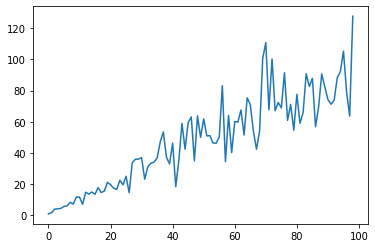

In [41]:
plt.plot(varList)

## Implementation of the new algorithm

In [58]:
def runRandomWalker(nSteps):
    position = 0
    positionsList = np.zeros(nSteps)
    for i in range(nSteps):
        positionsList[i] = position
        dx = np.random.choice([-1,1])
        position += dx
    return positionsList

def generateEnsemble(nEnsemble, nSteps):
    dataMatrix = np.zeros((nEnsemble, nSteps))
    for walker in range(nEnsemble):
        dataMatrix[walker,:] = runRandomWalker(nSteps)
        
    return dataMatrix

In [65]:
nEnsemble = 1000
nSteps = 200
dataMatrix = generateEnsemble(nEnsemble, nSteps)


In [66]:
meanList = dataMatrix.mean(axis=0)
varList = dataMatrix.var(axis=0)

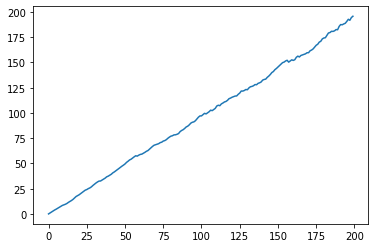

In [67]:
plt.plot(varList)